In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

2025-04-23 23:05:29.140399: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 23:05:29.373678: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 23:05:29.573778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 23:05:29.783342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 23:05:29.784917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 23:05:30.072815: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
train_x, train_y = pd.read_csv('ProcessedData/X_train.csv', index_col=False), pd.read_csv('ProcessedData/Y_train.csv', index_col=False)
test_x, test_y = pd.read_csv('ProcessedData/X_test.csv', index_col=False), pd.read_csv('ProcessedData/Y_test.csv', index_col=False)

# Test create 1 model

In [3]:
# create model
layer1 = layers.Dense(128, activation='relu')
layer2 = layers.Dense(64, activation='relu')
layer3 = layers.Dense(32, activation='relu')
output = layers.Dense(1, activation='sigmoid')
model = keras.Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(test_x, test_y), verbose=2)

Epoch 1/100
218/218 - 3s - 12ms/step - accuracy: 0.5105 - loss: 6.6215 - val_accuracy: 0.5083 - val_loss: 7.9127
Epoch 2/100
218/218 - 0s - 2ms/step - accuracy: 0.5309 - loss: 4.6024 - val_accuracy: 0.4991 - val_loss: 12.8692
Epoch 3/100
218/218 - 0s - 2ms/step - accuracy: 0.5457 - loss: 5.0455 - val_accuracy: 0.5262 - val_loss: 4.0240
Epoch 4/100
218/218 - 0s - 2ms/step - accuracy: 0.5844 - loss: 2.4717 - val_accuracy: 0.6348 - val_loss: 0.6873
Epoch 5/100
218/218 - 1s - 3ms/step - accuracy: 0.5804 - loss: 2.5441 - val_accuracy: 0.5555 - val_loss: 1.4531
Epoch 6/100
218/218 - 0s - 2ms/step - accuracy: 0.6104 - loss: 1.8522 - val_accuracy: 0.5348 - val_loss: 3.0073
Epoch 7/100
218/218 - 1s - 4ms/step - accuracy: 0.6470 - loss: 1.0489 - val_accuracy: 0.6463 - val_loss: 0.7773
Epoch 8/100
218/218 - 0s - 2ms/step - accuracy: 0.6747 - loss: 1.0068 - val_accuracy: 0.6509 - val_loss: 0.6986
Epoch 9/100
218/218 - 1s - 3ms/step - accuracy: 0.6224 - loss: 1.6012 - val_accuracy: 0.5733 - val_los

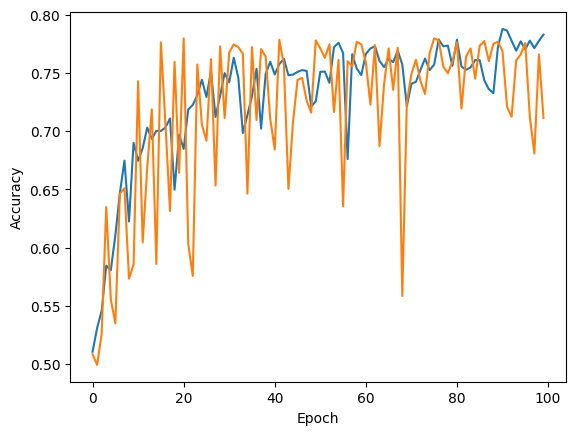

In [5]:
# plot history in matplotlib
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

100 epochs seems like a good stop

# Run multiple models to see which one's best

In [ ]:
# watch out: different learning rates might need different number of epochs

import itertools

params = {"learning_rate": [0.1, 0.03, 0.01, 0.003], 
          "batch_size": [32, 64], 
          "activation_function": ['relu', 'tanh']}

for (lr, bs, af) in itertools.product(*params.values()):
    layer1 = layers.Dense(128, activation=af)
    layer2 = layers.Dense(64, activation=af)
    layer3 = layers.Dense(64, activation=af)
    output = layers.Dense(1, activation='sigmoid')

    model = keras.Sequential()
    model.add(layer1)
    model.add(layer2)
    model.add(layer3)
    model.add(output)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    h = model.fit(train_x, train_y, epochs=120, batch_size=bs, validation_data=(test_x, test_y), verbose=0)
    print(f"Model. Learning Rate: {lr}, Batch Size: {bs}, Activation Function: {af}, Accuracy: {h.history['val_accuracy'][-1]}")

Model. Learning Rate: 0.1, Batch Size: 32, Activation Function: relu, Accuracy: 0.4951121211051941


KeyboardInterrupt: 

In [6]:
layer1 = layers.Dense(128, activation='sigmoid')
layer2 = layers.Dense(64, activation='sigmoid')
layer3 = layers.Dense(64, activation='sigmoid')
output = layers.Dense(1, activation='sigmoid')

model = keras.Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(output)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    0.001,
    decay_steps=100000,
    decay_rate=0.97,
    staircase=True)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

h = model.fit(train_x, train_y, epochs=150, batch_size=128, validation_data=(test_x, test_y), verbose=1)

Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4957 - loss: 0.6950 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5008 - loss: 0.6971 - val_accuracy: 0.4945 - val_loss: 0.6952
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.6968 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4986 - loss: 0.6943 - val_accuracy: 0.5049 - val_loss: 0.6973
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 0.6976 - val_accuracy: 0.5049 - val_loss: 0.6988
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5116 - loss: 0.6955 - val_accuracy: 0.4957 - val_loss: 0.6937
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4948 - loss: 0.6941 - val_accuracy: 0.4951 - val_loss: 0.6932
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.4957 - v

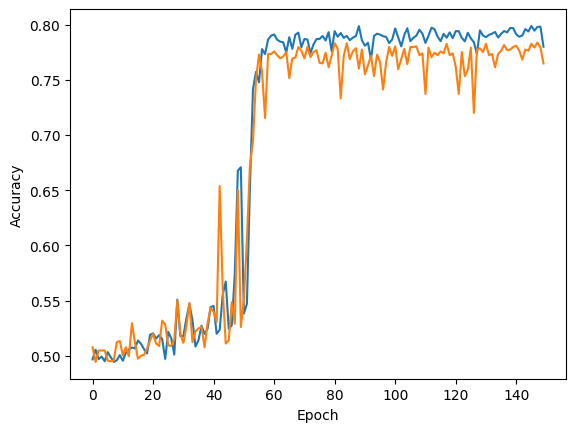

In [7]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()